In [1]:
# Imports
import numpy as np

from skimage.measure import label, regionprops

from scipy.spatial import distance
#from scipy.ndimage import label

from tqdm import tqdm

import sys
sys.path.append('../src/')


import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def compute_area(cell_id, num_time_steps):
    areas = []
    for i in range(num_time_steps-1):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            areas.append(regs_cell[0].area)
        except IndexError:
            areas.append(0)
    areas = np.array(areas)
    return areas

def compute_length(cell_id, num_time_steps):
    lengths = []
    for i in range(num_time_steps-1):
        regs_cell = regionprops((label_stack[i] == cell_id).astype(int))
        try:
            lengths.append(regs_cell[0].major_axis_length)
        except IndexError:
            lengths.append(0)
    lengths = np.array(lengths)
    return lengths

# Load data

In [3]:
# Load data
data = np.load('../example_data/Pos57/PH/track_output/inputs_all_red.npz')
inputs_all = data['inputs_all']

data = np.load('../example_data/Pos57/PH/track_output/label_stack.npz')
label_stack = data['label_stack']

# Select examples

In [4]:
max_cell = np.max(label_stack)
num_time_steps = len(label_stack)

areas_all_cells = [len(np.where(compute_area(m, num_time_steps) == 0)[0]) for m in range(int(max_cell))]

np.where(np.array(areas_all_cells) == 0)

(array([ 0,  1,  4,  5,  8,  9, 11, 12, 16, 17, 18, 23, 24, 25, 26, 27, 29,
        30, 33, 34, 35, 36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51,
        53, 54, 55, 58, 59, 61, 64, 66, 67, 71]),)

## Features

In [10]:
cell_id=51

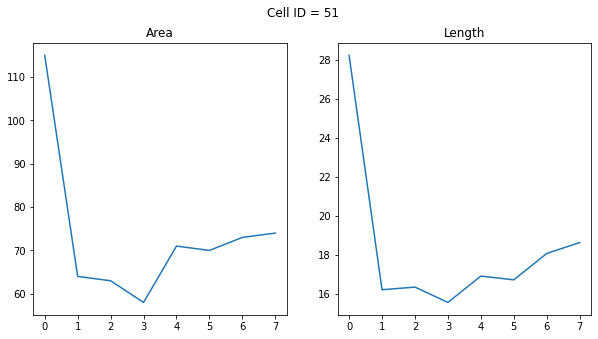

In [11]:
%matplotlib inline

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(compute_area(cell_id, num_time_steps))
plt.title('Area')

plt.subplot(1,2,2)
plt.plot(compute_length(cell_id, num_time_steps))
plt.title('Length')

plt.suptitle('Cell ID = ' + str(cell_id))

plt.show()

# Segmentation: good and bad examples

Text(0.5, 0.98, 'Timeframe 5')

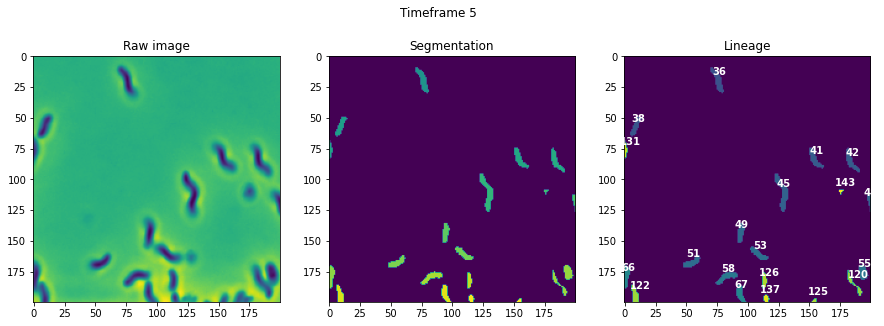

In [26]:
time_frame=5
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.imshow(inputs_all[time_frame][300:500,50:250,0])
plt.title('Raw image')

plt.subplot(1,3,2)
plt.imshow(inputs_all[time_frame][300:500,50:250,1])
plt.title('Segmentation')

ax = plt.subplot(1,3,3)
img = label_stack[time_frame][300:500,50:250]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
plt.suptitle('Timeframe 5')

Text(0.5, 0.98, 'Timeframe 6')

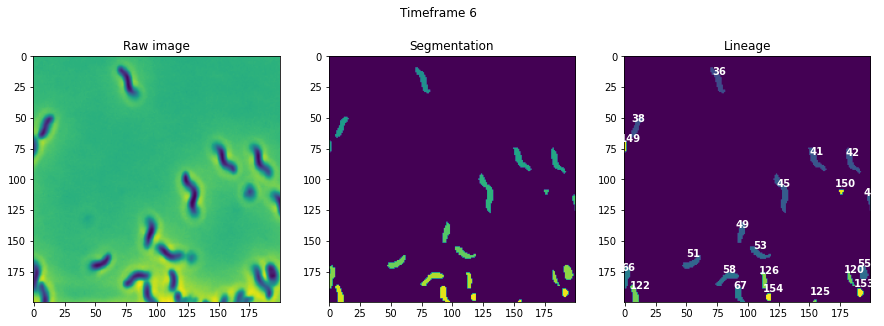

In [27]:
time_frame=6
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.imshow(inputs_all[time_frame][300:500,50:250,0])
plt.title('Raw image')

plt.subplot(1,3,2)
plt.imshow(inputs_all[time_frame][300:500,50:250,1])
plt.title('Segmentation')

ax = plt.subplot(1,3,3)
img = label_stack[time_frame][300:500,50:250]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
plt.suptitle('Timeframe 6')

Text(0.5, 0.98, 'Timeframe 7')

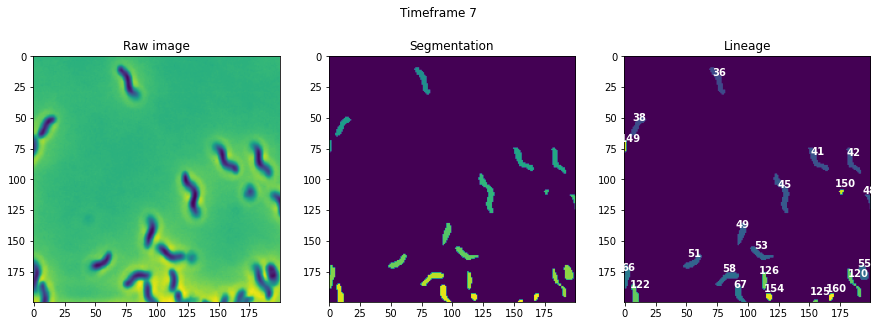

In [28]:
time_frame=7
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.imshow(inputs_all[time_frame][300:500,50:250,0])
plt.title('Raw image')

plt.subplot(1,3,2)
plt.imshow(inputs_all[time_frame][300:500,50:250,1])
plt.title('Segmentation')

ax = plt.subplot(1,3,3)
img = label_stack[time_frame][300:500,50:250]
plt.imshow(img)
plt.title('Lineage')
reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
plt.suptitle('Timeframe 7')